In [66]:
import ccxt
import pprint

# with open("../binance.key") as f:
#     lines = f.readlines()
#     api_key = lines[0].strip()
#     api_secret = lines[1].strip()
   

api_key = "3o8od3V5ePVCnZ19u34KydThmSgbD2ekCV4yD9ZclRogzMvMl4RPFlfLW8fVpzFX"
api_secret = "ZRzqHcLKS7Lnemy5cwM2Cck0HRnguN59jQvzAqrrXAoZvGwS9AKZk1dHbvZqBXyA"

exchange = ccxt.binance(config={
    'apiKey': api_key,
    'secret': api_secret,
    'enableRateLimit': True,
    'options': {
        'defaultType': 'future'       # 선물 거래
    }
})
print(exchange)

markets = exchange.load_markets()
tickers = exchange.fetch_tickers()

# :usdt 종목 선별
symbols = tickers.keys()
usdt_symbols = [x for x in symbols if x.endswith("USDT")]

import pandas as pd

timeframe = '1d'

# 각 코인의 가격 데이터를 저장할 딕셔너리
prices_data = {}

# 각 심볼에 대해 OHLCV 데이터를 가져와서 딕셔너리에 저장
for symbol in usdt_symbols:
    ohlcv = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=2000)
    df = pd.DataFrame(ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')  # timestamp를 datetime으로 변환
    df['amout'] = df['close'] * df['volume']
    if len(df) > 600:
        print(symbol)
        prices_data[symbol] = df

Binance
KAVA/USDT:USDT
IOST/USDT:USDT
REEF/USDT:USDT
GRT/USDT:USDT
RSR/USDT:USDT
MATIC/USDT:USDT
ATOM/USDT:USDT
COTI/USDT:USDT
ANKR/USDT:USDT
ZEC/USDT:USDT
ONE/USDT:USDT
FTM/USDT:USDT
API3/USDT:USDT
UNI/USDT:USDT
CTSI/USDT:USDT
LINA/USDT:USDT
RLC/USDT:USDT
CHZ/USDT:USDT
XEM/USDT:USDT
DGB/USDT:USDT
SUSHI/USDT:USDT
ARPA/USDT:USDT
DASH/USDT:USDT
BLZ/USDT:USDT
AVAX/USDT:USDT
MTL/USDT:USDT
ETH/USDT:USDT
CELO/USDT:USDT
FLOW/USDT:USDT
KLAY/USDT:USDT
EGLD/USDT:USDT
KNC/USDT:USDT
BTCDOM/USDT:USDT
AUDIO/USDT:USDT
CELR/USDT:USDT
DENT/USDT:USDT
BNB/USDT:USDT
TOMO/USDT:USDT
HOT/USDT:USDT
ZEN/USDT:USDT
AR/USDT:USDT
FIL/USDT:USDT
IMX/USDT:USDT
ENS/USDT:USDT
REN/USDT:USDT
PEOPLE/USDT:USDT
ONT/USDT:USDT
RVN/USDT:USDT
LIT/USDT:USDT
LPT/USDT:USDT
ZRX/USDT:USDT
XRP/USDT:USDT
SXP/USDT:USDT
COMP/USDT:USDT
ALGO/USDT:USDT
NKN/USDT:USDT
BAKE/USDT:USDT
BEL/USDT:USDT
AAVE/USDT:USDT
ALICE/USDT:USDT
ALPHA/USDT:USDT
LTC/USDT:USDT
RUNE/USDT:USDT
ATA/USDT:USDT
ETC/USDT:USDT
MKR/USDT:USDT
XTZ/USDT:USDT
HBAR/USDT:USDT


In [167]:
for key, df in prices_data.items():
    df['close'] = df['close'].astype(float)

In [161]:
import pandas as pd

# 특정 값 이상의 행만 남기기 위한 함수 정의
def filter_df(df, threshold):
    df['amout'] = df['amout'].astype(float)
    return df[df['amout'] >= threshold]

filtered_data_dict = prices_data
# 각 데이터프레임에 함수 적용하여 필터링
threshold_value = 1000000
# filtered_data_dict = {key: filter_df(value, threshold_value) for key, value in prices_data.items()}

keys_to_remove = []
for key, df in filtered_data_dict.items():
    df['amout'] = df['amout'].astype(float)
    if df['amout'].mean() < 500000000: 
        keys_to_remove.append(key) 

 #딕셔너리에서 특정 키 삭제       
for key in keys_to_remove:
    del filtered_data_dict[key]

print(filtered_data_dict)


{'ETH/USDT:USDT':        datetime     open     high      low    close       volume         amout
0    2019-11-27   146.00   155.66   125.03   152.52   115911.840  1.767887e+07
1    2019-11-28   154.29   156.52   146.41   150.48   116824.070  1.757969e+07
2    2019-11-29   150.56   157.40   150.55   154.41   167906.104  2.592638e+07
3    2019-11-30   154.40   155.15   149.66   151.38   370491.615  5.608502e+07
4    2019-12-01   151.38   152.50   145.50   150.65   394494.119  5.943054e+07
...         ...      ...      ...      ...      ...          ...           ...
1470 2023-12-06  2293.97  2314.98  2218.49  2233.29  2935176.941  6.555101e+09
1471 2023-12-07  2233.32  2387.20  2222.08  2357.04  3592068.146  8.466648e+09
1472 2023-12-08  2357.05  2397.44  2333.36  2360.82  2691981.223  6.355283e+09
1473 2023-12-09  2360.82  2407.63  2328.00  2342.40  2422255.370  5.673891e+09
1474 2023-12-10  2342.41  2357.00  2341.48  2356.70   229883.886  5.417674e+08

[1475 rows x 7 columns], 'BNB/USD

### 모델 학습

In [162]:
prices_data = filtered_data_dict

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 윈도우 사이즈
window_size = 30


# 윈도우에 따른 데이터 정규화 함수 정의
def window_scaler(window_data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(window_data)

columns = ['open', 'high', 'low', 'close', 'volume']
scaled_data = []

# # 데이터 합치기
# for key, value in prices_data.items():
#     data = value
#     for start in range(len(data) - window_size):
#         end = start + window_size
#         window_data = data[columns][start:end]
#         scaled_window_data = window_scaler(window_data)
#         scaled_data.append(scaled_window_data)

# 개별
for start in range(len(data) - window_size):
    end = start + window_size
    window_data = data[columns][start:end]
    scaled_window_data = window_scaler(window_data)
    scaled_data.append(scaled_window_data)

        
# 리스트를 numpy 배열로 변환
scaled_data = np.array(scaled_data)

# 예측할 조건 설정
forecast_days = 7  # 예측하려는 일수

# 특성(Features)과 레이블(Labels)을 위한 빈 리스트 생성
features = []
labels = []

# 예측 조건에 따른 레이블 생성
# for key, value in prices_data.items():
#     data = value
#     for i in range(len(data) - window_size - forecast_days):
#         print(i)
#         features.append(scaled_data[i])
#         close_today = data['close'][i + window_size - 1]
#         close_future = data['close'][i + window_size + forecast_days - 1]
#         labels.append(int(close_future > close_today))

        
for i in range(len(scaled_data) - forecast_days):
    features.append(scaled_data[i])
    close_today = data['close'][i + window_size - 1]
    close_future = data['close'][i + window_size + forecast_days - 1]
    labels.append(int(close_future > close_today))

# numpy 배열로 변환
features = np.array(features)
labels = np.array(labels)

from sklearn.model_selection import train_test_split

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



In [164]:
# 모델 생성
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# 두 번째 LSTM 층
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, batch_size=1, epochs=50, validation_split=0.1, verbose=1)

# 모델 평가
model.evaluate(X_test, y_test)




Epoch 1/50
6858/6858 [==============================] - 42s 6ms/step - loss: 0.2551 - val_loss: 0.2479
Epoch 2/50
6858/6858 [==============================] - 41s 6ms/step - loss: 0.2521 - val_loss: 0.2574
Epoch 3/50
6858/6858 [==============================] - 41s 6ms/step - loss: 0.2519 - val_loss: 0.2480
Epoch 4/50
6858/6858 [==============================] - 40s 6ms/step - loss: 0.2517 - val_loss: 0.2488
Epoch 5/50
6858/6858 [==============================] - 39s 6ms/step - loss: 0.2514 - val_loss: 0.2528
Epoch 6/50
6858/6858 [==============================] - 39s 6ms/step - loss: 0.2511 - val_loss: 0.2478
Epoch 7/50
6858/6858 [==============================] - 40s 6ms/step - loss: 0.2504 - val_loss: 0.2477
Epoch 8/50
6858/6858 [==============================] - 40s 6ms/step - loss: 0.2502 - val_loss: 0.2559
Epoch 9/50
6858/6858 [==============================] - 40s 6ms/step - loss: 0.2505 - val_loss: 0.2477
Epoch 10/50
6858/6858 [==============================] - 39s 6ms/step - l

0.2463889718055725

In [165]:
model.save('LSTM_3.h5')

c:\Users\tomkj\anaconda3\envs\autobot\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [174]:
from tensorflow.keras.models import load_model

model = load_model('./model/LSTM_2.h5')

## 백테스트


In [32]:
model.predict(historical_features)

43/43 [==============================] - 0s 3ms/step


array([[0.09423374],
       [0.10801129],
       [0.13117747],
       ...,
       [0.908771  ],
       [0.93265736],
       [0.8732486 ]], dtype=float32)

In [185]:
sym_list

['ETH/USDT:USDT',
 'BNB/USDT:USDT',
 'XRP/USDT:USDT',
 'BTC/USDT:USDT',
 'GMT/USDT:USDT',
 'SOL/USDT:USDT',
 'DOGE/USDT:USDT',
 '1000SHIB/USDT:USDT']

ETH/USDT:USDT
45/45 [==============================] - 0s 3ms/step


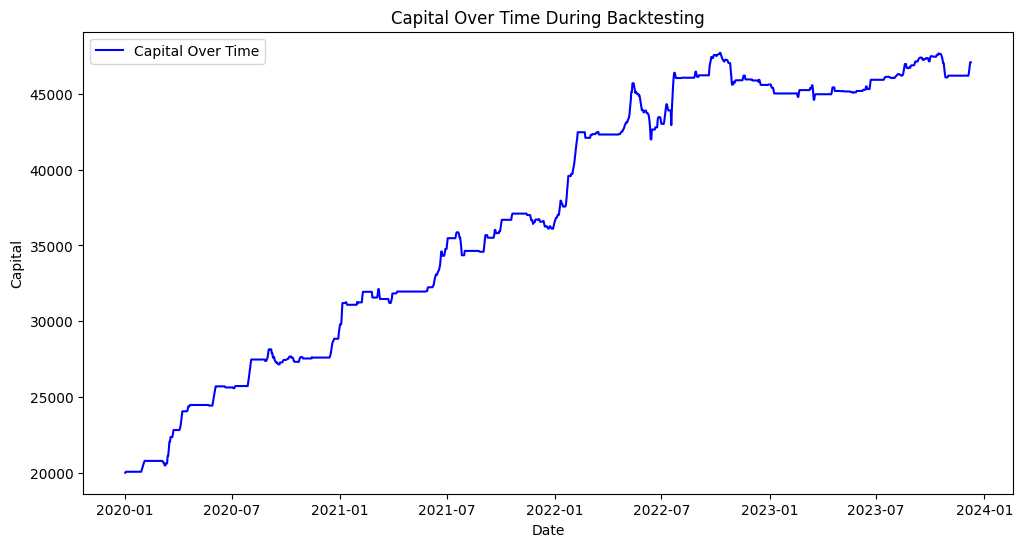

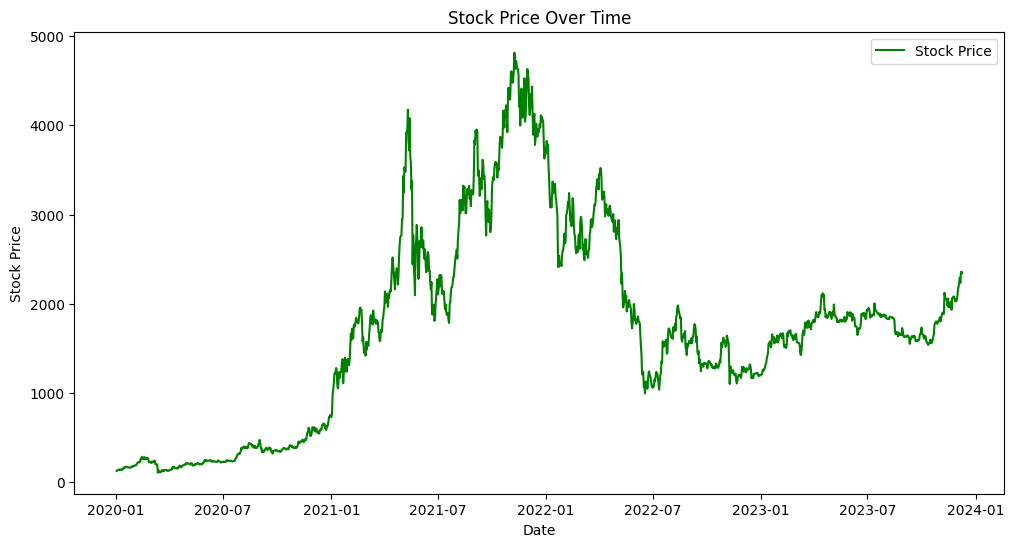

In [186]:
# 과거 주식 데이터 로드
window_size = 30
forecast_days = 7
data = prices_data[sym_list[0]]
print(sym_list[0])
data.reset_index(drop=True, inplace=True)
historical_data = data

# 매수 및 매도 조건 설정
buy_threshold = 0.7  # 매수 조건 확률 임계값
sell_threshold = 0.3  # 매도 조건 확률 임계값


# 데이터 정규화 및 특성 생성
scaled_historical_data = []
for start in range(len(historical_data) - window_size):
    end = start + window_size
    window_data = historical_data[columns][start:end]
    scaled_window_data = window_scaler(window_data)
    scaled_historical_data.append(scaled_window_data)

scaled_historical_data = np.array(scaled_historical_data)

# 특성 생성
historical_features = []
for i in range(len(scaled_historical_data) - forecast_days):
    historical_features.append(scaled_historical_data[i])

historical_features = np.array(historical_features)


# 모델로 과거 데이터 예측
predicted = model.predict(historical_features)
# predicted = (predicted > 0.5).astype(int)

import matplotlib.pyplot as plt

dates = historical_data['datetime'][window_size + forecast_days - 1:len(predicted) + window_size + forecast_days - 1]

# 백테스팅 시뮬레이션
initial_capital = 20000.0
capital = initial_capital
capital_history = []  # 초기 자본을 리스트에 추가
profit_history = []
bet_size = 1000

# historical_predictions의 길이에 맞게 반복
for i in range(len(predicted)):
    
    # 예측에 해당하는 실제 인덱스 계산
    actual_index = i + window_size + forecast_days - 1
    predicted_value = predicted[i][0]  # 예측 확률 값


    if predicted_value >= buy_threshold:
        # 상승 예측: 매수 포지션
        if capital >= bet_size:
            profit = bet_size * (historical_data['close'][actual_index] / historical_data['close'][actual_index - forecast_days] - 1)
            profit_history.append(profit)
            capital += profit  # 수익 추가
    elif predicted_value <= sell_threshold:
        # 하락 예측: 매도 포지션
        if capital >= bet_size:
            profit = bet_size * (1 - historical_data['close'][actual_index] / historical_data['close'][actual_index - forecast_days])
            profit_history.append(profit)
            capital += profit  # 수익 추가

    capital_history.append(capital)
    
    bet_size = capital_history[-1]/20


# dates 리스트 생성
dates = historical_data['datetime'][window_size + forecast_days - 1: window_size + forecast_days - 1 + len(predicted)]

# 자본 변화 시각화
plt.figure(figsize=(12, 6))
plt.plot(dates, capital_history, label='Capital Over Time', color='blue')
plt.title('Capital Over Time During Backtesting')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.show()

# 주가 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(dates, historical_data['close'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(predicted)], label='Stock Price', color='green')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [177]:
len(profit_history)

449

In [184]:
sym_list = []
for key in prices_data.items():
    sym_list.append(key[0])

In [52]:
capital_history

[]

In [53]:
predicted = (predicted > 0.5).astype(int)

initial_capital = 100000.0  # 초기 자본
capital = initial_capital
capital_history = [capital]  # 자본 변화 추적
bet_size = 1000  # 투자 금액

# 백테스팅 시뮬레이션
for i in range(len(predicted)):
    # 매수 조건 (예측이 1인 경우)
    if predicted[i] == 1:
        # 매수 및 수익 계산
        if capital >= bet_size:
            profit = bet_size * (historical_data['close'][i] / historical_data['close'][i - 1] - 1)
            capital += profit
    # 매도 조건 (예측이 0인 경우)
    else:
        # 매도 및 수익 계산
        if capital >= bet_size:
            profit = bet_size * (1 - historical_data['close'][i] / historical_data['close'][i - 1])
            capital += profit
    capital_history.append(capital)

# 백테스팅 결과 시각화
plt.plot(capital_history)
plt.title('Backtesting results with LSTM')
plt.xlabel('Trades')
plt.ylabel('Capital')
plt.show()

KeyError: -1

In [54]:
# 예측 성공 여부 계산
prediction_success = [
    1 if (predicted[i] == 1 and historical_data['close'][window_size + forecast_days - 1 + i] > historical_data['close'][window_size + forecast_days - 1 + i - forecast_days]) or
       (predicted[i] == 0 and historical_data['close'][window_size + forecast_days - 1 + i] < historical_data['close'][window_size + forecast_days - 1 + i - forecast_days])
    else 0
    for i in range(len(predicted))
]

# DataFrame 생성
backtesting_df = pd.DataFrame({
    'Date': dates,
    'Open': historical_data['open'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)],
    'High': historical_data['high'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)],
    'Low': historical_data['low'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)],
    'Close': historical_data['close'][window_size + forecast_days - 1:window_size + forecast_days - 1 + len(historical_predictions)],
    'Profit': profit_history,
    'Capital': capital_history,  # 첫 번째 초기 자본 제외
    'Prediction': predicted,
    'Prediction Success': prediction_success
})

# DataFrame 출력
print(backtesting_df)


ValueError: Per-column arrays must each be 1-dimensional

In [285]:
import pandas as pd

# DataFrame 생성 (예시 데이터)

# 'column_name' 열에서 1의 개수 세기
count_ones = (backtesting_df['Prediction Success'] == 1).sum()

# 'column_name' 열에서 0의 개수 세기
count_zeros = (backtesting_df['Prediction Success'] == 0).sum()

print(f"1의 개수: {count_ones}")
print(f"0의 개수: {count_zeros}")
print(count_ones/(count_zeros+count_ones))

1의 개수: 84
0의 개수: 79
0.5153374233128835


In [278]:
backtesting_df.to_excel("backtest.xlsx")